<a href="https://colab.research.google.com/github/suranjandey2012/Machine-Learning/blob/Assignments/Spectral_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



12. **Python Coding Assignment: Spectral Clustering from Scratch**
Objective: Implement the Spectral Clustering algorithm from scratch using Python and NumPy. The assignment aims to deepen understanding of spectral clustering concepts and algorithms through hands-on implementation.
Tasks:

1. Data Generation:
•
Generate synthetic datasets with different shapes (e.g., circles, moons, blobs) using Python libraries such as scikit-learn or NumPy.

2. Similarity Matrix Calculation:
·
Implement a function to calculate the similarity matrix (affinity matrix) using a specified similarity measure (e.g., Gaussian kernel, k-nearest neighbors).




3. Normalized Laplacian Matrix:
·
Implement a function to compute the normalized Laplacian matrix from the similarity matrix.

4. Eigenvalue Decomposition:
• Perform eigenvalue decomposition on the normalized Laplacian matrix to obtain the eigenvectors and eigenvalues.

5. K-Means Clustering:
• Cluster the eigenvectors obtained from eigenvalue decomposition using the K-Means algorithm.

6. Spectral Clustering Algorithm:
• Combine the above components to implement the Spectral Clustering algorithm.
• Allow for customization of parameters such as the number of clusters, similarity measure, and clustering algorithm.

7. Evaluation Metrics:
·
Implement functions to calculate clustering evaluation metrics such as silhouette score, Davies-Bouldin index, and adjusted Rand index.

8. Experimentation:

• Apply the implemented Spectral Clustering algorithm to the synthetic datasets generated in step 1.

⚫ Evaluate the clustering results using the implemented evaluation metrics.

• Visualize the clustering results and compare them with ground truth labels (if available). Deliverables:

Python script or Jupyter Notebook containing the implementation of Spectral Clustering from scratch.

README file explaining the Spectral Clustering algorithm, implementation details, and usage instructions.
usage instructions.

Visualizations of clustering results and evaluation metrics to demonstrate the effectiveness of the implemented algorithm.

**DATA GENERATION**

<ipython-input-1-e89e59d062a7>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(data[i][:,0],data[i][:,1],cmap='coolwarm', edgecolor='k')


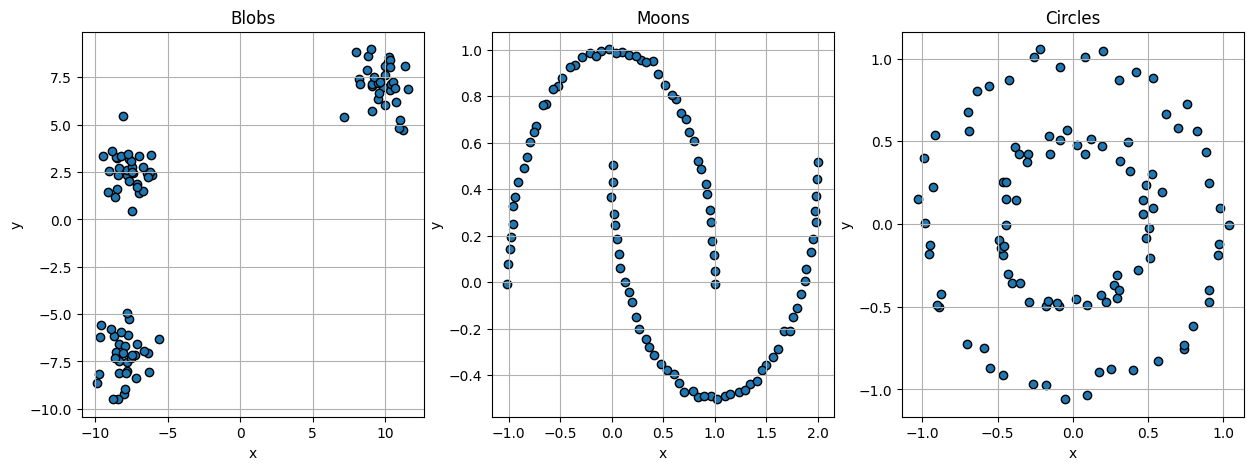

In [1]:
from sklearn.datasets import make_blobs,make_circles,make_moons
import numpy as np
import matplotlib.pyplot as plt

Xb,Yb=make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0)
Xm,Ym=make_moons(n_samples=100,noise=0.01)
Xc,Yc=make_circles(n_samples=100,noise=0.05,factor=0.5)
data=[Xb,Xm,Xc]
titles=['Blobs','Moons','Circles']
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i in range(3):
  axes[i].scatter(data[i][:,0],data[i][:,1],cmap='coolwarm', edgecolor='k')
  axes[i].set_xlabel('x')
  axes[i].set_ylabel('y')
  axes[i].set_title(titles[i])
  axes[i].grid(True)
plt.show()

**Similarity Matrix Calculation:**

In [41]:
def compute_similarity(data,sigma=1.0): #Using The Gaussian Kernel Function
  pairwise_dist=[]
  for i in range(data.shape[0]):
    indv_point_dist=[]
    for j in range(data.shape[0]):
      indv_point_dist.append(np.linalg.norm(data[i]-data[j]))
    pairwise_dist.append(indv_point_dist)
  pairwise_dist=np.array(pairwise_dist)
  S=np.exp((-pairwise_dist**2)/2*(sigma**2))   #Gaussian Kernel Function
  return S

Sb=compute_similarity(Xb)
Sm=compute_similarity(Xm)
Sc=compute_similarity(Xc)

Sc


array([[1.        , 0.42077414, 0.78838541, ..., 0.37171536, 0.76862045,
        0.99280646],
       [0.42077414, 1.        , 0.13959893, ..., 0.9919593 , 0.13575562,
        0.37019688],
       [0.78838541, 0.13959893, 1.        , ..., 0.11860705, 0.99550976,
        0.84489671],
       ...,
       [0.37171536, 0.9919593 , 0.11860705, ..., 1.        , 0.11632836,
        0.32671072],
       [0.76862045, 0.13575562, 0.99550976, ..., 0.11632836, 1.        ,
        0.82993806],
       [0.99280646, 0.37019688, 0.84489671, ..., 0.32671072, 0.82993806,
        1.        ]])

**Normalized Laplacian Matrix:**

In [35]:
def Compute_Normalized_Laplacian(data):
  column_sum=np.sum(data,axis=1)
  D_inv_sqrt=np.diag(np.power(column_sum,-0.5))
  Normalized_laplacian=np.eye(data.shape[0])-(D_inv_sqrt)@(data)@(D_inv_sqrt)  #Normalized Laplacian Formula
  return Normalized_laplacian

Normalized_Laplacian_Sb=Compute_Normalized_Laplacian(Sb)
Normalized_Laplacian_Sm=Compute_Normalized_Laplacian(Sm)
Normalized_Laplacian_Sc=Compute_Normalized_Laplacian(Sc)
Normalized_Laplacian_Sb

array([[ 3.43569117e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -1.02722527e-63,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.64664948e-01, -1.71548966e-75, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.71548966e-75,  7.09027681e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.02722527e-63,  0.00000000e+00,  0.00000000e+00, ...,
         1.07480900e-03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.09568609e-01, -7.54469872e-21],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -7.54469872e-21,  4.52900016e-01]])

**Eigenvalue Decomposition:**

In [36]:
from numpy import linalg as LA

def eigen_decomposition(Norm_matrix):
  ev,evect=LA.eig(Norm_matrix)
  return ev,evect

print(LA.eig(Normalized_Laplacian_Sb))


EigResult(eigenvalues=array([ 7.76181772e-01+0.00000000e+00j,  8.59649236e-01+0.00000000e+00j,
        9.66234507e-01+0.00000000e+00j,  9.47275760e-01+0.00000000e+00j,
        9.03768840e-01+0.00000000e+00j,  4.61451507e-01+0.00000000e+00j,
        7.68597481e-01+0.00000000e+00j,  9.57704711e-01+0.00000000e+00j,
        4.33464731e-01+0.00000000e+00j,  8.32836980e-01+0.00000000e+00j,
        8.23459385e-01+0.00000000e+00j,  8.57670645e-01+0.00000000e+00j,
        8.57723738e-01+0.00000000e+00j,  4.65263303e-01+0.00000000e+00j,
        8.07749503e-01+0.00000000e+00j,  6.43566550e-01+0.00000000e+00j,
        6.40119470e-01+0.00000000e+00j,  5.19432479e-01+0.00000000e+00j,
        5.09739702e-01+0.00000000e+00j,  3.84917797e-01+0.00000000e+00j,
        4.30569325e-01+0.00000000e+00j,  4.47595798e-01+0.00000000e+00j,
        4.52274031e-01+0.00000000e+00j,  3.71557374e-01+0.00000000e+00j,
        1.42552960e-01+0.00000000e+00j,  2.06215827e-01+0.00000000e+00j,
        1.79590277e-01+0.0000

**K-Means Clustering:**

In [37]:
from sklearn.cluster import KMeans

def Preprocess(evect):
  real=np.real(evect)
  img=np.imag(evect)
  return np.concatenate((real,img),axis=1)

def KMeansClustering(evect,no_clusters):
  model=KMeans(n_clusters=no_clusters,random_state=0)
  return model.fit_predict(Preprocess(evect))


**Spectral Clustering Algorithm**

In [38]:
def spectral_clustering(X,n_clusters,sigma=1.0):
  S=compute_similarity(X,sigma) #First compute the similarity matrix
  N_LMatrix=Compute_Normalized_Laplacian(S) #Compute the normalized Laplacian of the Similarity Matrix
  ev,evect=eigen_decomposition(N_LMatrix) #Fetch The Eigen value and eigen vector of the normalized Laplacian Matrix
  predicted_labels=KMeansClustering(evect,n_clusters) #Perform Clustering On the eigen vectors and get the predicted labels
  return predicted_labels

predicted_labels_b=spectral_clustering(Xb,3)
predicted_labels_c=spectral_clustering(Xc,3)
predicted_labels_m=spectral_clustering(Xm,3)


print(predicted_labels_b)
print(predicted_labels_c)
print(predicted_labels_m)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 1 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 0 0 0
 2 1 2 2 0 1 0 1 2 0 1 2 2 2 1 0 2 2 1 2 2 0 2 0 1 0 0 2 2 2 2 2 2 2 2 2 0
 2 0 2 2 2 2 2 2 2 0 2 0 2 0 0 2 2 0 2 2 1 2 2 2 2 2]
[1 1 1 1 1 2 1 1 0 0 1 2 2 1 1 1 1 0 0 2 1 0 0 1 2 1 1 1 0 2 0 1 0 1 1 1 2
 1 1 1 1 2 2 1 1 1 1 2 1 0 1 0 0 1 1 1 2 1 2 1 1 1 1 0 1 2 1 1 1 1 1 1 0 2
 2 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 0 1 0 0 0 1 0 0]
[2 1 2 2 1 2 2 2 1 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 2 0 2 0 2 2
 2 1 2 0 2 1 2 2 2 0 2 2 0 0 2 2 2 0 2 0 2 0 2 2 1 1 2 0 2 1 0 2 0 2 2 2 2
 2 0 1 2 2 1 2 2 2 1 2 2 0 2 2 2 2 1 2 2 2 1 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**7. Evaluation Metrics:**

In [91]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,adjusted_rand_score
def Evaluation(X,true_label,Plabel):
  print("Silhouette_score:",silhouette_score(X,Plabel))
  print("Davies_bouldin_score:",davies_bouldin_score(X,Plabel))
  print("Adjusted_rand_score:",adjusted_rand_score(true_label,Plabel))
  return (silhouette_score(X,Plabel),davies_bouldin_score(X,Plabel),adjusted_rand_score(true_label,Plabel))


**Experimentation:**

In [92]:
#Xb,Yb=make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0)
#Xm,Ym=make_moons(n_samples=100,noise=0.01)
#Xc,Yc=make_circles(n_samples=100,noise=0.05,factor=0.5)

#Blobs
Blob_Plabel=spectral_clustering(Xb,3,2.1)
print("Blob Evaluation Scores:")
Blob_Metrics=Evaluation(Xb,Yb,Blob_Plabel)
print("------------------------------------------------------------------")
Moon_Plabel=spectral_clustering(Xm,2,50)
print("Moon Evaluation Scores:")
Moon_Metrics=Evaluation(Xm,Ym,Moon_Plabel)
print("------------------------------------------------------------------")
Circle_Plabel=spectral_clustering(Xc,2,50)
print("Circle Evaluation Scores:")
Circle_Metrics=Evaluation(Xc,Yc,Circle_Plabel)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Blob Evaluation Scores:
Silhouette_score: 0.4568938879352068
Davies_bouldin_score: 0.6953915097552982
Adjusted_rand_score: 0.6688465864122964
------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Moon Evaluation Scores:
Silhouette_score: 0.3147098097504616
Davies_bouldin_score: 1.1855567347109446
Adjusted_rand_score: 1.0
------------------------------------------------------------------
Circle Evaluation Scores:
Silhouette_score: 0.12803916320477188
Davies_bouldin_score: 6.4457963025148
Adjusted_rand_score: 0.513874614594039


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


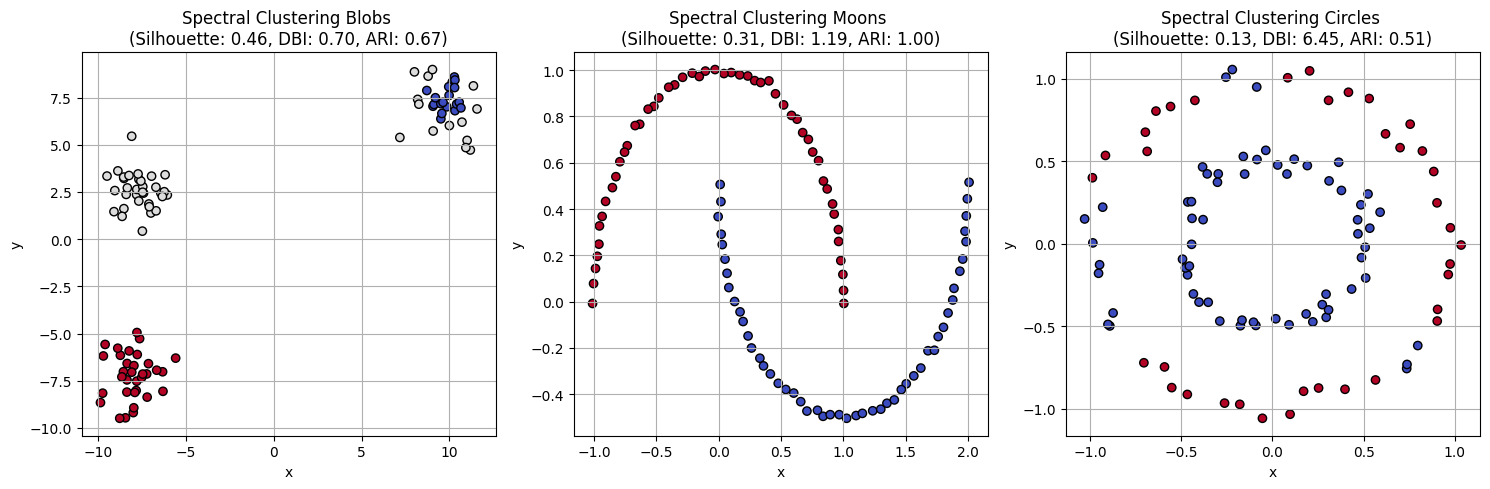

In [97]:
data=[Xb,Xm,Xc]
titles=['Spectral Clustering Blobs','Spectral Clustering Moons','Spectral Clustering Circles']
Plabels=[Blob_Plabel,Moon_Plabel,Circle_Plabel]
Metrics=[Blob_Metrics,Moon_Metrics,Circle_Metrics]
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i in range(3):
  axes[i].scatter(data[i][:,0],data[i][:,1],c=Plabels[i],cmap='coolwarm', edgecolor='k')
  #c=predicted_labels, cmap='viridis', s=50, edgecolors='k'
  axes[i].set_xlabel('x')
  axes[i].set_ylabel('y')
  axes[i].set_title(f"{titles[i]} \n(Silhouette: {Metrics[i][0]:.2f}, DBI: {Metrics[i][1]:.2f}, ARI: {Metrics[i][2]:.2f})")
  #plt.title(f"Spectral Clustering - {dataset_name} (Silhouette: {silhouette:.2f}, DBI: {davies_bouldin:.2f}, ARI: {rand_index:.2f})")
  axes[i].grid(True)
plt.tight_layout()
plt.show()